# THEMIS minimum variance analysis

This notebook shows how to transform THEMIS tplot variables into minimum variance analysis coordinates

This command sets up the PySPEDAS environment when running in Google Colab.  You can skip it or comment it out if you're running this notebook in an environment that already has PySPEDAS installed.


In [1]:
!pip install pyspedas


[notice] A new release of pip available: 22.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


First, load some FGM data

In [2]:
import pyspedas

In [3]:
pyspedas.projects.themis.fgm(probe='b', 
                             trange=['2012-06-03/18:00:00', '2012-06-03/19:00:00'],
                             coord='gsm',
                             get_support_data=True,
                             time_clip=True)

27-Jan-25 16:33:28: Downloading remote index: https://themis.ssl.berkeley.edu/data/themis/thb/l2/fgm/2012/
27-Jan-25 16:33:29: Downloading https://themis.ssl.berkeley.edu/data/themis/thb/l2/fgm/2012/thb_l2_fgm_20120603_v01.cdf to themis_data/thb/l2/fgm/2012/thb_l2_fgm_20120603_v01.cdf
27-Jan-25 16:33:49: Download complete: themis_data/thb/l2/fgm/2012/thb_l2_fgm_20120603_v01.cdf
27-Jan-25 16:33:49: time_clip: thb_fgh_btotal has no data in requested range
27-Jan-25 16:33:49: time_clip: thb_fgh_gsm has no data in requested range


['thb_fgs_btotal',
 'thb_fgs_gsm',
 'thb_fgl_btotal',
 'thb_fgl_gsm',
 'thb_fgh_btotal',
 'thb_fgh_gsm']

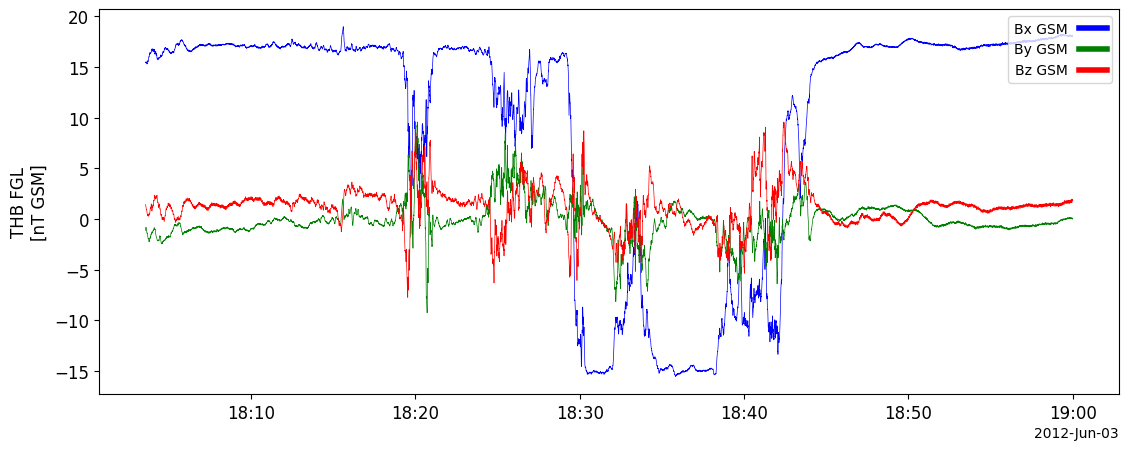

In [4]:
from pyspedas import tplot
tplot('thb_fgl_gsm')

## Clip time range

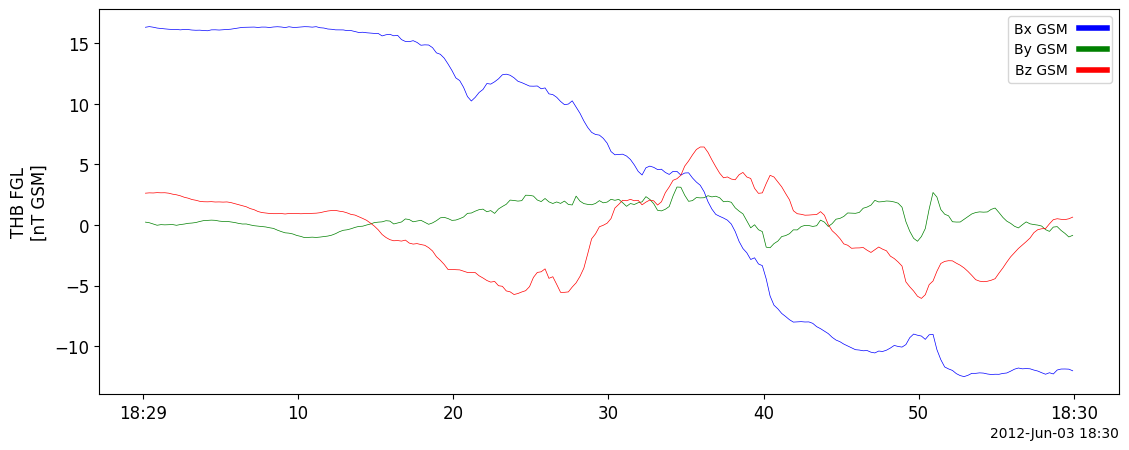

In [5]:
from pyspedas import time_clip
time_clip('thb_fgl_gsm', '2012-06-03/18:29:00','2012-06-03/18:30:00', overwrite=True)
tplot('thb_fgl_gsm')

## Single transformation

In [6]:
from pyspedas import minvar_matrix_make

Calculate the transformation matrix

In [7]:
minvar_matrix_make('thb_fgl_gsm')

['thb_fgl_gsm_mva_mat']

Rotate the B-field data using the MVA matrix

In [8]:
from pyspedas import tvector_rotate

In [9]:
tvector_rotate('thb_fgl_gsm_mva_mat', 'thb_fgl_gsm', newname='thb_fgl_gsm_mva')

['thb_fgl_gsm_mva']

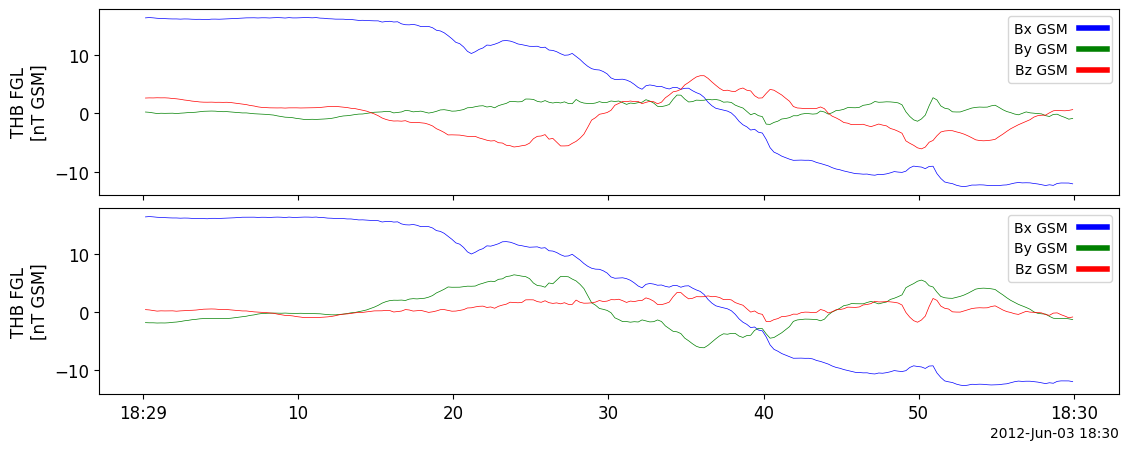

In [10]:
tplot(['thb_fgl_gsm','thb_fgl_gsm_mva'])